In [1]:
import pandas as pd
import os
import geopandas as gpd
import numpy as np
from geodatasets import get_path
import matplotlib.pyplot as plt

In [2]:
dir = "GLOBFIRE_burned_area_full_dataset_2002_2023"

## Load a single shape file

In [3]:
fp = os.path.join(dir,'original_globfire_filtered_2022.shp')
#os.listdir(dir)

In [4]:
data = gpd.read_file(fp)

In [5]:
data

,_uid_,id,initialdat,finaldate,area_ha,geometry
0,1.0,25688592.0,2022-08-23,2022-08-30,364.626801,"POLYGON ((28.06051 -31.58333, 28.06176 -31.587..."
1,2.0,25688596.0,2022-08-26,2022-08-26,21.448625,"POLYGON ((27.51270 -31.58333, 27.51759 -31.583..."
2,3.0,25688597.0,2022-08-19,2022-08-19,21.448625,"POLYGON ((27.74258 -31.58333, 27.74747 -31.583..."
3,4.0,25688598.0,2022-08-12,2022-08-17,85.794575,"POLYGON ((29.09025 -31.59167, 29.09155 -31.595..."
4,5.0,25688599.0,2022-08-28,2022-08-28,21.448625,"POLYGON ((29.20504 -31.58333, 29.20993 -31.583..."
...,...,...,...,...,...,...
961889,961890.0,25688587.0,2022-08-28,2022-08-28,21.448457,"POLYGON ((29.11996 -31.54583, 29.12485 -31.545..."
961890,961891.0,25688589.0,2022-08-12,2022-08-16,257.382331,"POLYGON ((27.86477 -31.56667, 27.86602 -31.570..."
961891,961892.0,25688590.0,2022-08-13,2022-08-17,107.242460,"MULTIPOLYGON (((29.25850 -31.56667, 29.26339 -..."
961892,961893.0,25688591.0,2022-08-16,2022-08-16,128.695033,"POLYGON ((27.45032 -31.57083, 27.46011 -31.570..."


In [6]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
#data.geometry.centroid
df1 = data.to_crs('+proj=cea')

In [8]:
burntareacenters = df1.geometry.centroid

In [9]:
firecenters = burntareacenters.to_crs(data.crs)

In [10]:
world = gpd.read_file(get_path("naturalearth.land"))

<Axes: >

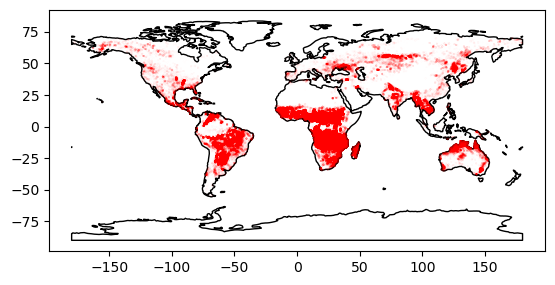

In [11]:
ax = world.plot(color="white",edgecolor="black")
firecenters.plot(ax=ax,color="red",markersize = data["area_ha"]/np.max(data["area_ha"]))

Text(0.5, 0, 'Log (Burned Area (hPA))')

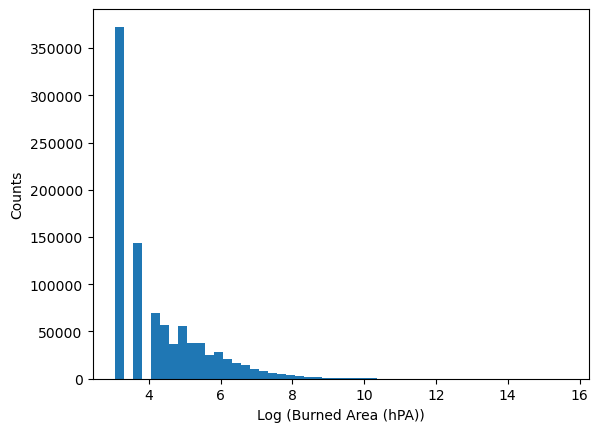

In [12]:
plt.hist(np.log(data["area_ha"]),bins=50)
plt.ylabel("Counts")
plt.xlabel("Log (Burned Area (hPA))")

In [13]:
grbfile = "narr-a_221_19790510_0600_000.grb"

In [16]:
import xarray as xr
import cfgrib
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cfgrib'

In [15]:
ds = xr.load(grbfile, engine="cfgrib")

AttributeError: module 'xarray' has no attribute 'load'